In [14]:
import pandas as pd

banknotes = pd.read_csv('data/banknotes.csv')
banknotes['class'] = banknotes['class'].map({0: 'real', 1:'fake'})

In [15]:
banknotes.head(3)

,variace,skewness,curtosis,entropy,class
0,3.6216,8.6661,-2.8073,-0.44699,real
1,4.5459,8.1674,-2.4586,-1.46210,real
2,3.8660,-2.6383,1.9242,0.10645,real


In [16]:
# Import seaborn
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

In [17]:
sns.set_style('darkgrid')
mpl.rcParams['figure.figsize'] = [15,10]

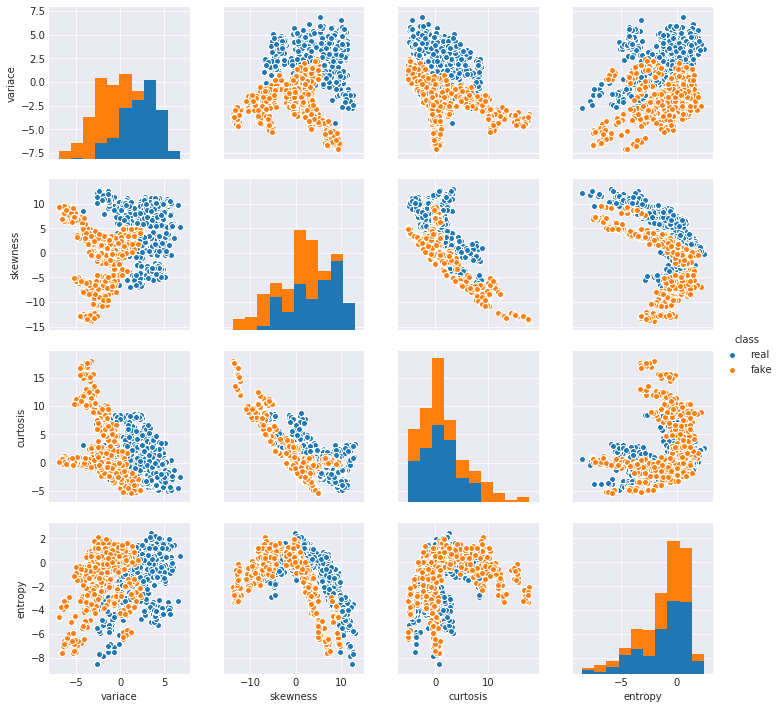

Dataset stats: 
            variace     skewness     curtosis      entropy
count  1372.000000  1372.000000  1372.000000  1372.000000
mean      0.433735     1.922353     1.397627    -1.191657
std       2.842763     5.869047     4.310030     2.101013
min      -7.042100   -13.773100    -5.286100    -8.548200
25%      -1.773000    -1.708200    -1.574975    -2.413450
50%       0.496180     2.319650     0.616630    -0.586650
75%       2.821475     6.814625     3.179250     0.394810
max       6.824800    12.951600    17.927400     2.449500
Observations per class: 
 real    762
fake    610
Name: class, dtype: int64


In [18]:
# Use pairplot and set the hue to be our class
sns.pairplot(banknotes, hue='class') 

# Show the plot
plt.show()

# Describe the data
print('Dataset stats: \n', banknotes.describe())

# Count the number of observations of each class
print('Observations per class: \n', banknotes['class'].value_counts())

In [23]:
# Import the sequential model and dense layer
from keras.models import Sequential
from keras.layers import Dense

# Create a sequential model
model = Sequential()

# Add a dense layer 
model.add(Dense(1, input_shape=(4,), activation='sigmoid'))

# Compile your model
model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])

# Display a summary of your model
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 1)                 5         
Total params: 5
Trainable params: 5
Non-trainable params: 0
_________________________________________________________________


In [30]:
from sklearn.model_selection import train_test_split

banknotes = pd.read_csv('data/banknotes.csv')
X = banknotes.drop('class', axis=1)
y = banknotes['class']

In [31]:
X_train, X_test, y_train, y_test = train_test_split(
                     X, y, test_size=0.33, random_state=42)

In [32]:
# Train your model for 20 epochs
model.fit(X_train, y_train, epochs=20)

# Evaluate your model accuracy on the test set
accuracy = model.evaluate(X_test, y_test)[1]

# Print accuracy
print('Accuracy:',accuracy)

Epoch 1/20
919/919 [==============================] - 2s 2ms/step - loss: 2.5229 - accuracy: 0.5234
Epoch 2/20
919/919 [==============================] - 0s 84us/step - loss: 1.5626 - accuracy: 0.5419
Epoch 3/20
919/919 [==============================] - 0s 85us/step - loss: 0.7956 - accuracy: 0.6017
Epoch 4/20
919/919 [==============================] - 0s 79us/step - loss: 0.4482 - accuracy: 0.7584
Epoch 5/20
919/919 [==============================] - 0s 97us/step - loss: 0.3365 - accuracy: 0.9086
Epoch 6/20
919/919 [==============================] - 0s 86us/step - loss: 0.2813 - accuracy: 0.9380
Epoch 7/20
919/919 [==============================] - 0s 86us/step - loss: 0.2474 - accuracy: 0.9489
Epoch 8/20
919/919 [==============================] - 0s 136us/step - loss: 0.2242 - accuracy: 0.9489
Epoch 9/20
919/919 [==============================] - 0s 78us/step - loss: 0.2070 - accuracy: 0.9521
Epoch 10/20
919/919 [==============================] - 0s 86us/step - loss: 0.1936 - accura

In [34]:
# Instantiate a sequential model
model = Sequential()
  
# Add 3 dense layers of 128, 64 and 32 neurons each
model.add(Dense(128, input_shape=(2,), activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
  
# Add a dense layer with as many neurons as competitors
model.add(Dense(4, activation='softmax'))
  
# Compile your model using categorical_crossentropy loss
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [35]:
darts = pd.read_csv('data/darts.csv')

In [36]:
# Transform into a categorical variable
darts.competitor = pd.Categorical(darts.competitor)

# Assign a number to each category (label encoding)
darts.competitor = darts.competitor.cat.codes 

# Print the label encoded competitors
print('Label encoded competitors: \n',darts.competitor.head())

Label encoded competitors: 
 0    2
1    3
2    1
3    0
4    2
Name: competitor, dtype: int8


In [37]:
# Import to_categorical from keras utils module
from keras.utils import to_categorical

# Use to_categorical on your labels
coordinates = darts.drop(['competitor'], axis=1)
competitors = to_categorical(darts.competitor)

# Now print the to_categorical() result
print('One-hot encoded competitors: \n',competitors)

One-hot encoded competitors: 
 [[0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 ...
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]]


In [38]:
coord_train, coord_test, competitors_train, competitors_test = train_test_split(coordinates,
                                                                               competitors,
                                                                               test_size=.33,
                                                                               random_state=73)

In [39]:
# Train your model on the training data for 200 epochs
model.fit(coord_train, competitors_train, epochs=200)

# Evaluate your model accuracy on the test data
accuracy = model.evaluate(coord_test, competitors_test)[1]

Epoch 1/200
536/536 [==============================] - 1s 1ms/step - loss: 1.3694 - accuracy: 0.2556
Epoch 2/200
536/536 [==============================] - 0s 111us/step - loss: 1.3321 - accuracy: 0.2817
Epoch 3/200
536/536 [==============================] - 0s 135us/step - loss: 1.2879 - accuracy: 0.3153
Epoch 4/200
536/536 [==============================] - 0s 126us/step - loss: 1.2358 - accuracy: 0.4272
Epoch 5/200
536/536 [==============================] - 0s 133us/step - loss: 1.1700 - accuracy: 0.5112
Epoch 6/200
536/536 [==============================] - 0s 132us/step - loss: 1.0951 - accuracy: 0.5466
Epoch 7/200
536/536 [==============================] - 0s 123us/step - loss: 1.0110 - accuracy: 0.5616
Epoch 8/200
536/536 [==============================] - 0s 129us/step - loss: 0.9346 - accuracy: 0.5914
Epoch 9/200
536/536 [==============================] - 0s 142us/step - loss: 0.8881 - accuracy: 0.6362
Epoch 10/200
536/536 [==============================] - 0s 156us/step - los

In [40]:
# Print accuracy
print('Accuracy:', accuracy)

Accuracy: 0.7916666865348816


In [46]:
import numpy as np
# Predict on coords_small_test
preds = model.predict(coord_test)

# Print preds vs true values
print("{:45} | {}".format('Raw Model Predictions','True labels'))
for i,pred in enumerate(preds):
  print("{} | {}".format(pred,competitors_test[i]))

Raw Model Predictions                         | True labels
[0.17488167 0.05630357 0.03938048 0.72943425] | [0. 0. 0. 1.]
[0.18304393 0.00613371 0.7867656  0.02405684] | [0. 0. 1. 0.]
[1.3575655e-04 9.9950182e-01 7.2622602e-06 3.5521406e-04] | [0. 1. 0. 0.]
[0.19647959 0.02226073 0.7514812  0.02977843] | [0. 0. 1. 0.]
[0.6922525  0.00926487 0.28549236 0.01299025] | [0. 0. 1. 0.]
[0.19101578 0.00568577 0.7818921  0.02140632] | [0. 0. 1. 0.]
[1.4064976e-02 9.8432618e-01 1.3147824e-03 2.9405500e-04] | [0. 1. 0. 0.]
[0.11691125 0.01880095 0.84038466 0.02390317] | [1. 0. 0. 0.]
[0.24904884 0.01849183 0.724327   0.0081323 ] | [0. 0. 1. 0.]
[0.00713849 0.0022525  0.00198068 0.9886283 ] | [1. 0. 0. 0.]
[0.39781916 0.01764202 0.5772384  0.00730036] | [1. 0. 0. 0.]
[0.2479733  0.01392135 0.72849256 0.00961276] | [1. 0. 0. 0.]
[2.9992109e-02 3.0638402e-02 1.5057289e-04 9.3921888e-01] | [0. 0. 0. 1.]
[0.07871135 0.86016554 0.01918198 0.04194114] | [0. 1. 0. 0.]
[0.20461799 0.01449119 0.04416814 0.

In [47]:
# Extract the indexes of the highest probable predictions
preds = [np.argmax(pred) for pred in preds]

# Print preds vs true values
print("{:10} | {}".format('Rounded Model Predictions','True labels'))
for i,pred in enumerate(preds):
  print("{:25} | {}".format(pred,competitors_test[i]))

Rounded Model Predictions | True labels
                        3 | [0. 0. 0. 1.]
                        2 | [0. 0. 1. 0.]
                        1 | [0. 1. 0. 0.]
                        2 | [0. 0. 1. 0.]
                        0 | [0. 0. 1. 0.]
                        2 | [0. 0. 1. 0.]
                        1 | [0. 1. 0. 0.]
                        2 | [1. 0. 0. 0.]
                        2 | [0. 0. 1. 0.]
                        3 | [1. 0. 0. 0.]
                        2 | [1. 0. 0. 0.]
                        2 | [1. 0. 0. 0.]
                        3 | [0. 0. 0. 1.]
                        1 | [0. 1. 0. 0.]
                        3 | [1. 0. 0. 0.]
                        2 | [1. 0. 0. 0.]
                        3 | [0. 0. 0. 1.]
                        3 | [0. 0. 0. 1.]
                        3 | [1. 0. 0. 0.]
                        0 | [1. 0. 0. 0.]
                        2 | [0. 0. 1. 0.]
                        3 | [0. 0. 0. 1.]
                        3 | [0. 0. 0

In [50]:
# Instantiate a Sequential model
model = Sequential()

# Add a hidden layer of 64 neurons and a 20 neuron's input
model.add(Dense(64, input_shape=(20,), activation='relu'))

# Add an output layer of 3 neurons with sigmoid activation
model.add(Dense(3, activation='sigmoid'))

# Compile your model with adam and binary crossentropy loss
model.compile(optimizer='adam',
           loss='binary_crossentropy',
           metrics=['accuracy'])

model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 64)                1344      
_________________________________________________________________
dense_14 (Dense)             (None, 3)                 195       
Total params: 1,539
Trainable params: 1,539
Non-trainable params: 0
_________________________________________________________________


In [52]:
irr_data = pd.read_csv('data/irrigation_machine.csv', index_col=0)
irr_data.head(3)

,sensor_0,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6,sensor_7,sensor_8,sensor_9,...,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,parcel_0,parcel_1,parcel_2
0,1.0,2.0,1.0,7.0,0.0,1.0,1.0,4.0,0.0,3.0,...,8.0,1.0,0.0,2.0,1.0,9.0,2.0,0,1,0
1,5.0,1.0,3.0,5.0,2.0,2.0,1.0,2.0,3.0,1.0,...,4.0,5.0,5.0,2.0,2.0,2.0,7.0,0,0,0
2,3.0,1.0,4.0,3.0,4.0,0.0,1.0,6.0,0.0,2.0,...,3.0,3.0,1.0,0.0,3.0,1.0,0.0,1,1,0


In [56]:
sensors = irr_data.iloc[:,0:20]
sensors.head(3)

,sensor_0,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6,sensor_7,sensor_8,sensor_9,sensor_10,sensor_11,sensor_12,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19
0,1.0,2.0,1.0,7.0,0.0,1.0,1.0,4.0,0.0,3.0,1.0,3.0,6.0,8.0,1.0,0.0,2.0,1.0,9.0,2.0
1,5.0,1.0,3.0,5.0,2.0,2.0,1.0,2.0,3.0,1.0,3.0,2.0,2.0,4.0,5.0,5.0,2.0,2.0,2.0,7.0
2,3.0,1.0,4.0,3.0,4.0,0.0,1.0,6.0,0.0,2.0,3.0,2.0,4.0,3.0,3.0,1.0,0.0,3.0,1.0,0.0


In [57]:
parcels = irr_data.iloc[:,20:]
parcels.head(3)

,parcel_0,parcel_1,parcel_2
0,0,1,0
1,0,0,0
2,1,1,0


In [58]:
sensors_train, sensors_test, parcels_train, parcels_test = train_test_split(sensors,
                                                                           parcels,
                                                                           test_size=0.33,
                                                                           random_state=73)

In [61]:
# Train for 100 epochs using a validation split of 0.2
model.fit(sensors_train, parcels_train, epochs = 100, validation_split = 0.2)

# Predict on sensors_test and round up the predictions
preds = model.predict(sensors_test)
preds_rounded = np.round(preds)

# Print rounded preds
print('Rounded Predictions: \n', preds_rounded)

Train on 1072 samples, validate on 268 samples
Epoch 1/100
1072/1072 [==============================] - 0s 126us/step - loss: 0.1269 - accuracy: 0.9506 - val_loss: 0.2908 - val_accuracy: 0.8856
Epoch 2/100
1072/1072 [==============================] - 0s 138us/step - loss: 0.1262 - accuracy: 0.9524 - val_loss: 0.2915 - val_accuracy: 0.8806
Epoch 3/100
1072/1072 [==============================] - 0s 130us/step - loss: 0.1251 - accuracy: 0.9534 - val_loss: 0.2925 - val_accuracy: 0.8818
Epoch 4/100
1072/1072 [==============================] - 0s 112us/step - loss: 0.1246 - accuracy: 0.9537 - val_loss: 0.2949 - val_accuracy: 0.8843
Epoch 5/100
1072/1072 [==============================] - 0s 117us/step - loss: 0.1272 - accuracy: 0.9493 - val_loss: 0.3022 - val_accuracy: 0.8831
Epoch 6/100
1072/1072 [==============================] - 0s 122us/step - loss: 0.1271 - accuracy: 0.9512 - val_loss: 0.2980 - val_accuracy: 0.8818
Epoch 7/100
1072/1072 [==============================] - 0s 110us/step 

In [62]:
# Evaluate your model's accuracy on the test data
accuracy = model.evaluate(sensors_test, parcels_test)[1]

# Print accuracy
print('Accuracy:', accuracy)

660/660 [==============================] - 0s 40us/step
Accuracy: 0.8833333253860474
